In [1]:
import pandas as pd
import numpy as np

# Steps

#### 1. loads the data file;

In [2]:
wine = pd.read_csv('winequality-white.csv',delimiter=';') 

#### 2. constructs a new binary column “good wine” that indicates whether the wine is good (which we define as having a quality of 7 or higher

In [3]:
wine['good'] =  wine['quality'] >= 7

In [4]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,False
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,False
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,False
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,True


#### 3. splits the data set into a training data set (first 2,500 samples), a validation data set (next 1,250 samples) and a test data set (remaining samples) — please do not shuffle the data, so as the make the results comparable;

In [5]:
wine_train=wine.iloc[0:2500]
wine_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,6.3,0.18,0.22,1.5,0.043,45.0,155.0,0.99238,3.19,0.48,10.2,5,False
2496,8.6,0.23,0.25,11.3,0.031,13.0,96.0,0.99645,3.11,0.40,10.8,5,False
2497,6.8,0.21,0.36,18.1,0.046,32.0,133.0,1.00000,3.27,0.48,8.8,5,False
2498,6.8,0.21,0.36,18.1,0.046,32.0,133.0,1.00000,3.27,0.48,8.8,5,False


In [6]:
wine_validate=wine.iloc[2500:3750]
wine_validate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
2500,6.8,0.21,0.36,18.1,0.046,32.0,133.0,1.00000,3.27,0.48,8.8,5,False
2501,6.4,0.31,0.40,6.4,0.039,39.0,191.0,0.99513,3.14,0.52,9.8,5,False
2502,8.6,0.34,0.36,1.4,0.045,11.0,119.0,0.99556,3.17,0.47,9.4,4,False
2503,8.6,0.34,0.36,1.4,0.045,11.0,119.0,0.99556,3.17,0.47,9.4,4,False
2504,8.5,0.30,0.28,3.1,0.054,54.0,174.0,0.99543,3.21,0.43,9.4,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,7.0,0.15,0.28,14.7,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,7,True
3746,7.4,0.27,0.28,1.8,0.040,45.0,121.0,0.99043,3.02,0.40,11.9,5,False
3747,6.8,0.22,0.30,10.6,0.070,67.0,194.0,0.99654,2.89,0.42,9.0,6,False
3748,6.2,0.24,0.25,12.5,0.055,47.0,134.0,0.99758,3.30,0.51,9.0,5,False


In [7]:
wine_test=wine.iloc[3750:]
wine_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
3750,7.0,0.15,0.28,14.7,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,7,True
3751,5.5,0.17,0.23,2.9,0.039,10.0,108.0,0.99243,3.28,0.50,10.0,5,False
3752,6.5,0.26,0.34,1.4,0.040,25.0,184.0,0.99216,3.29,0.46,10.7,5,False
3753,6.6,0.27,0.33,1.4,0.042,24.0,183.0,0.99215,3.29,0.46,10.7,5,False
3754,5.4,0.46,0.15,2.1,0.026,29.0,130.0,0.98953,3.39,0.77,13.4,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,False
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,False
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,False
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,True


#### 4. normalises each input feature of the data according to the Z-score transform;

In [8]:
wine_train_norm = ((wine_train - wine_train.mean())/wine_train.std(ddof=0)).iloc[:,:11]
wine_train_norm['quality'] = list(wine_train['quality'].copy())
wine_train_norm['good'] = list(wine_train['good'].copy())

wine_train_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,-0.113668,-0.108204,0.071461,2.793568,-0.105203,0.592100,0.546621,2.296527,-1.320171,-0.345547,-1.294361,6,False
1,-0.919985,0.184556,-0.079748,-0.942582,0.065332,-1.287891,-0.318617,-0.256509,0.578154,0.004516,-0.658517,6,False
2,1.153403,-0.010617,0.373879,0.094151,0.107966,-0.317573,-1.115548,0.144683,0.325044,-0.433062,-0.113507,6,False
3,0.116709,-0.498550,-0.230957,0.407127,0.449037,0.713390,0.910932,0.327042,-0.117899,-0.783124,-0.295177,6,False
4,0.116709,-0.498550,-0.230957,0.407127,0.449037,0.713390,0.910932,0.327042,-0.117899,-0.783124,-0.295177,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.919985,-0.986482,-0.987002,-0.962143,-0.190471,0.592100,0.205080,-0.847354,-0.117899,-0.083000,-0.022672,5,False
2496,1.729344,-0.498550,-0.760188,0.954835,-0.702078,-1.348536,-1.138317,0.637054,-0.624119,-0.783124,0.522337,5,False
2497,-0.344044,-0.693723,0.071461,2.284982,-0.062569,-0.196283,-0.295848,1.931807,0.388321,-0.083000,-1.294361,5,False
2498,-0.344044,-0.693723,0.071461,2.284982,-0.062569,-0.196283,-0.295848,1.931807,0.388321,-0.083000,-1.294361,5,False


In [9]:
wine_validate_norm = ((wine_validate - wine_validate.mean())/wine_validate.std(ddof=0)).iloc[:,:11]
wine_validate_norm['quality'] = list(wine_validate['quality'].copy())
wine_validate_norm['good'] = list(wine_validate['good'].copy())

wine_validate_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
2500,0.087216,-0.555075,0.312396,2.304618,0.224963,-0.225159,0.032854,2.036270,0.728001,-0.074800,-1.602935,5,False
2501,-0.450820,0.484547,0.706240,0.031298,-0.165056,0.176460,1.459140,0.547093,-0.190907,0.273757,-0.826199,5,False
2502,2.508378,0.796433,0.312396,-0.940206,0.169246,-1.430014,-0.311422,0.678581,0.021149,-0.161940,-1.136893,4,False
2503,2.508378,0.796433,0.312396,-0.940206,0.169246,-1.430014,-0.311422,0.678581,0.021149,-0.161940,-1.136893,4,False
2504,2.373869,0.380585,-0.475290,-0.609895,0.670698,1.037070,1.041091,0.638828,0.303890,-0.510497,-1.136893,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0.356234,-1.178848,-0.475290,1.643995,0.503547,-0.397281,0.426312,1.400235,-1.463241,-0.859054,-1.447588,7,True
3746,0.894270,0.068698,-0.475290,-0.862486,-0.109339,0.520704,-0.262240,-0.890101,-1.039129,-0.771914,0.804947,5,False
3747,0.087216,-0.451113,-0.278368,0.847361,1.562169,1.782933,1.532914,0.978251,-1.958037,-0.597636,-1.447588,6,False
3748,-0.719839,-0.243188,-0.770672,1.216533,0.726415,0.635452,0.057445,1.296268,0.940057,0.186617,-1.447588,5,False


In [10]:
wine_test_norm = ((wine_test - wine_test.mean())/wine_test.std(ddof=0)).iloc[:,:11]
wine_test_norm['quality'] = list(wine_test['quality'].copy())
wine_test_norm['good'] = list(wine_test['good'].copy())

wine_test_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
3750,0.781120,-1.379455,-0.231556,1.676153,0.221235,-0.328881,0.526150,1.621302,-1.492903,-0.902392,-1.377960,7,True
3751,-1.364500,-1.179838,-0.694346,-0.735309,-0.335225,-1.407612,-0.554128,-0.306528,0.814248,0.070660,-0.596730,5,False
3752,0.065914,-0.281560,0.323792,-1.041850,-0.288853,-0.555983,1.448338,-0.401339,0.886347,-0.283177,-0.049868,5,False
3753,0.208955,-0.181751,0.231234,-1.041850,-0.196110,-0.612758,1.421990,-0.404851,0.886347,-0.283177,-0.049868,5,False
3754,-1.507541,1.714615,-1.434809,-0.898798,-0.938055,-0.328881,0.025533,-1.324871,1.607331,2.459059,2.059455,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.363210,-0.780603,-0.138998,-1.000978,-0.335225,-0.612758,-0.975700,-0.759515,0.742150,0.070660,0.340747,6,False
4894,0.208955,0.317293,0.508907,0.306933,0.035748,1.260827,1.026767,0.560820,-0.123032,-0.283177,-0.909222,5,False
4895,0.065914,-0.481177,-1.064578,-1.082723,-0.242481,-0.272106,-0.475083,-0.267901,-1.276608,-0.283177,-1.065468,6,False
4896,-1.364500,0.017866,-0.046440,-1.103159,-1.123542,-0.839859,-0.501431,-1.619840,1.246839,-0.990852,1.590716,7,True


#### 5. trains the k-Nearest Neighbours classifiers for k = 1, 10, 20, 30, …,100, 200, 500;

In [21]:
# code reference https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier 
def k_neigh(k, train_set, validation_set):
    from sklearn.neighbors import KNeighborsClassifier
    
    X = [i for i in train_set.iloc[:,:11].values.tolist()]
    y = [i for i in train_set.iloc[:,11].values.tolist()]
    
    neigh = KNeighborsClassifier(n_neighbors=k) #The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 
    neigh.fit(X, y) #Fit the k-nearest neighbors classifier from the training dataset.
    validation_set['predicted quality'] = neigh.predict(validation_set.iloc[:,:11].values.tolist()).tolist()
    
    return validation_set['predicted quality']

def accuracy(k, train_set, validation_set):
    from sklearn.metrics import accuracy_score
    
    y_pred = k_neigh(k, train_set, validation_set)
    y_true = wine_validate_norm['quality']
    
    return accuracy_score(y_true, y_pred)

def plt_confusion_matrix(k, train_set, validation_set):
    import matplotlib.pyplot as plt  
    from sklearn.datasets import make_classification
    from sklearn.metrics import plot_confusion_matrix
    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier

    X_train, X_test = train_set.iloc[:,:11], validation_set.iloc[:,:11]
    y_train, y_test = train_set['quality'], validation_set['quality']
    clf = SVC(random_state=0)
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    SVC(random_state=0)
    plot_confusion_matrix(clf, X_test, y_test)  
    plt.show()  
    
    

when k= 1
Percentage of the validation samples correctly classifised = 0.4368
Confusion matrix:


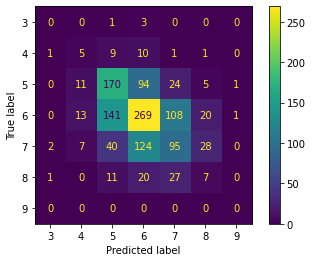

when k= 10
Percentage of the validation samples correctly classifised = 0.4584
Confusion matrix:


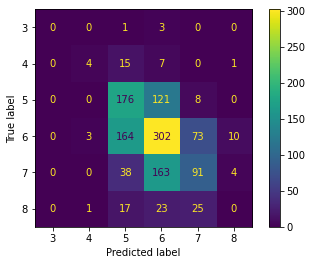

when k= 20
Percentage of the validation samples correctly classifised = 0.456
Confusion matrix:


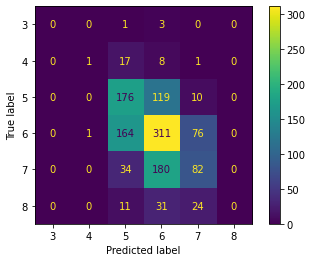

when k= 30
Percentage of the validation samples correctly classifised = 0.46
Confusion matrix:


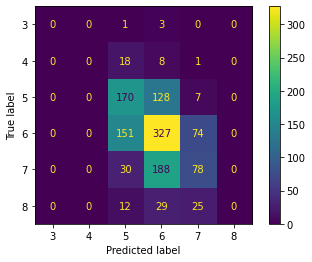

when k= 100
Percentage of the validation samples correctly classifised = 0.484
Confusion matrix:


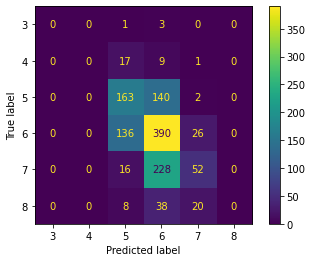

when k= 200
Percentage of the validation samples correctly classifised = 0.4888
Confusion matrix:


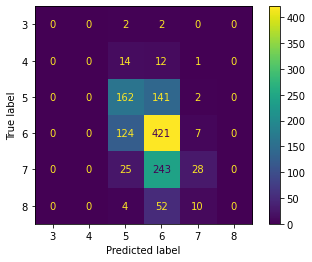

when k= 500
Percentage of the validation samples correctly classifised = 0.448
Confusion matrix:


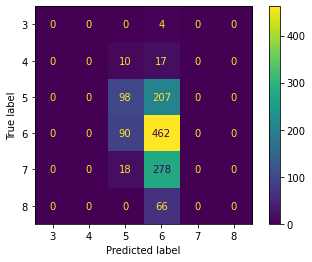

In [23]:
k = [1, 10, 20, 30, 100, 200, 500]
c_rate=[]
for i in k:
    c_perc = accuracy(i, wine_train_norm, wine_validate_norm)
    print('when k=',i)
    print('Percentage of the validation samples correctly classifised =', c_perc) 
    print('Confusion matrix:')
    plt_confusion_matrix(i, wine_train_norm, wine_validate_norm)
    
    c_rate.append(c_perc)

#### 6. evaluates each classifier using the validation data set and selects the best classifier;

In [13]:
best_k = k[c_rate.index(max(c_rate))]
print('parameter k =',best_k,'gives the best result')

parameter k = 200 gives the best result


 #### 7. predicts the generalisation error using the test data set.

In [14]:
k = best_k
g_error = correct_predict_percentage(k, wine_train_norm, wine_test_norm)
print('generalisation error when k =', k, 'is', g_error)

generalisation error when k = 200 is 0.5505226480836237


# Classifier performance

### Good side

The training set-validation set-test set is better than just training set-validation set. With test set, we can validate the model in validation set and apply the model to new, unseen test set to get an unbiased estimate.

### Shortcomings

#### 1. Ratio of interesting data is too low - adapt oversampling

A confusion matrix for test set is plotted below using the best k=200

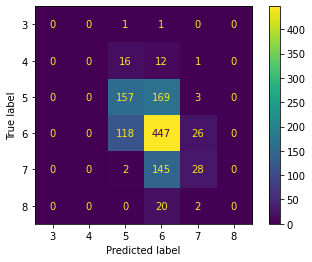

In [15]:
plt_confusion_matrix(200, wine_train_norm, wine_test_norm)

From the confusion plot, we can see that quality 6 is quite well predicted. However, half of the quality 5 wrongly predicted as 6, 83% of quality 7 wrongly predicted as 6, 91% of quality 8 wrongly predicted as 6. This classifier is not well-suited as it caused too much bias.

Most of the wine are wrongly defined as quality 6 may due to too large ratio of quality 6 wine in the training set. So let's see the exact ratio below.

In [16]:
for i in range(1, max(wine_train['quality'])+1):
    count = wine_train_norm['quality'].tolist().count(i)
    print('count of quality', i,'=', count, ',' , round(count/len(wine_train)*100),'%' )

count of quality 1 = 0 , 0 %
count of quality 2 = 0 , 0 %
count of quality 3 = 14 , 1 %
count of quality 4 = 107 , 4 %
count of quality 5 = 823 , 33 %
count of quality 6 = 1055 , 42 %
count of quality 7 = 409 , 16 %
count of quality 8 = 87 , 3 %
count of quality 9 = 5 , 0 %


The counting and ratio supports the guessing above - ratio of quality 6 is too large. This causes huge bias when k goes larger. 

Ideally, the data should consist of equal number of each quality. However, when getting unbiased data is impossible, and if we do care about qualty being differenciated in a wrong class, we should adapt oversampling to this classifier to overcome this problem.

#### 2. Different results for reshuffled data - adapt k-fold cross-validation

Another shortcoming of this classifier, is the different results for reshuffled data. With different training set and validation set, it is possible that a different best k is chosen. To overcome this, k-fold cross-validation should be adapted.